# Employee Attrition

Employee attrition refers to the loss of employees through a natural process, such as retirement, resignation, elimination of a position, personal health, or other similar reasons. It causes redution in size and/or strengths of workforce and can increase the workload for the remaining employees. Not only that, hiring new people can be financial and time consuming for a company, since it has to spend time in a good onboarding, trainings and development.

For those reasons, the goal of this project is to understand the main causes and think of solutions to avoid employees attrition.

## Content Table
[1. Script Configurations](#script-configurations)  
[2. Exploratory Data Analysis](#eda)  
[3. Data Manipulation](#data-manipulation)  
[4. Evaluation Metrics](#metrics)  
[5. Models](#models)  
    [5.1. Baseline](#baseline)  
    [5.2. Look at Some Models](#some-models)  
    [5.3. Logistic Regression](#logistic-regression)  
    [5.4. Feature Engineering](#feature-engineering)  
    [5.5. Feature Selection](#feature-selection)  
    [5.6. Oversampling](#oversampling)  
[6. Insights](#insights)  
    [6.1. Prediction](#prediction)  
    [6.2. Clustering](#clustering)  

## 1. Script Configurations <a class="anchor" id="script-configurations"></a>
---

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from itertools import combinations
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.linear_model import LogisticRegression as BaseLogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, fbeta_score, plot_confusion_matrix, precision_score, recall_score, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC

In [2]:
# Configurations
pd.set_option("display.max_columns", None)
plt.rcParams.update({"figure.max_open_warning": 0})
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [3]:
# Global variables
RESULTS_FOLDER = "results"
TEST_SIZE = 0.2
CV = 5

## 2. Exploratory Data Analysis <a class="anchor" id="eda"></a>
---

In this section, we tried to understand the provided dataset using visualization and statistic tools.

Some of the conclusions are:
-  'EmployeeCount', 'Over18' and 'StandardHours' have always the same values, and 'EmployeeNumber' doesn't add to the model, since it is the ID of the employee in the company.
- the dataset is unbalanced, since it has an 84%/16% class distribution.
- some features have categorical values.
- some numerical features are heavily skewed.

In [4]:
# Load dataset
dataframe = pd.read_excel("datasets/employee_attrition.xlsx")
dataframe.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Dataset shape
print(f"dataset shape: {dataframe.shape}")

dataset shape: (1470, 35)


In [6]:
# Features and types
dataframe.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Check for missing or null values
print(f"number of missing values: {dataframe.isna().sum().sum()}")
print(f"number of null values: {dataframe.isnull().values.sum()}")

number of missing values: 0
number of null values: 0


In [8]:
# Dataset statistics
dataframe.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Number of unique values
dataframe.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
# Categorical values
for feature, type_ in dataframe.dtypes.items():
    if type_ == object:
        print(f"{feature}: {dataframe[feature].unique()}")
        print(dataframe[feature].value_counts())
        print("-" * 80)

Attrition: ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
--------------------------------------------------------------------------------
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
--------------------------------------------------------------------------------
Department: ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
--------------------------------------------------------------------------------
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
--------------------------------

In [11]:
# Attrition count
dataframe["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

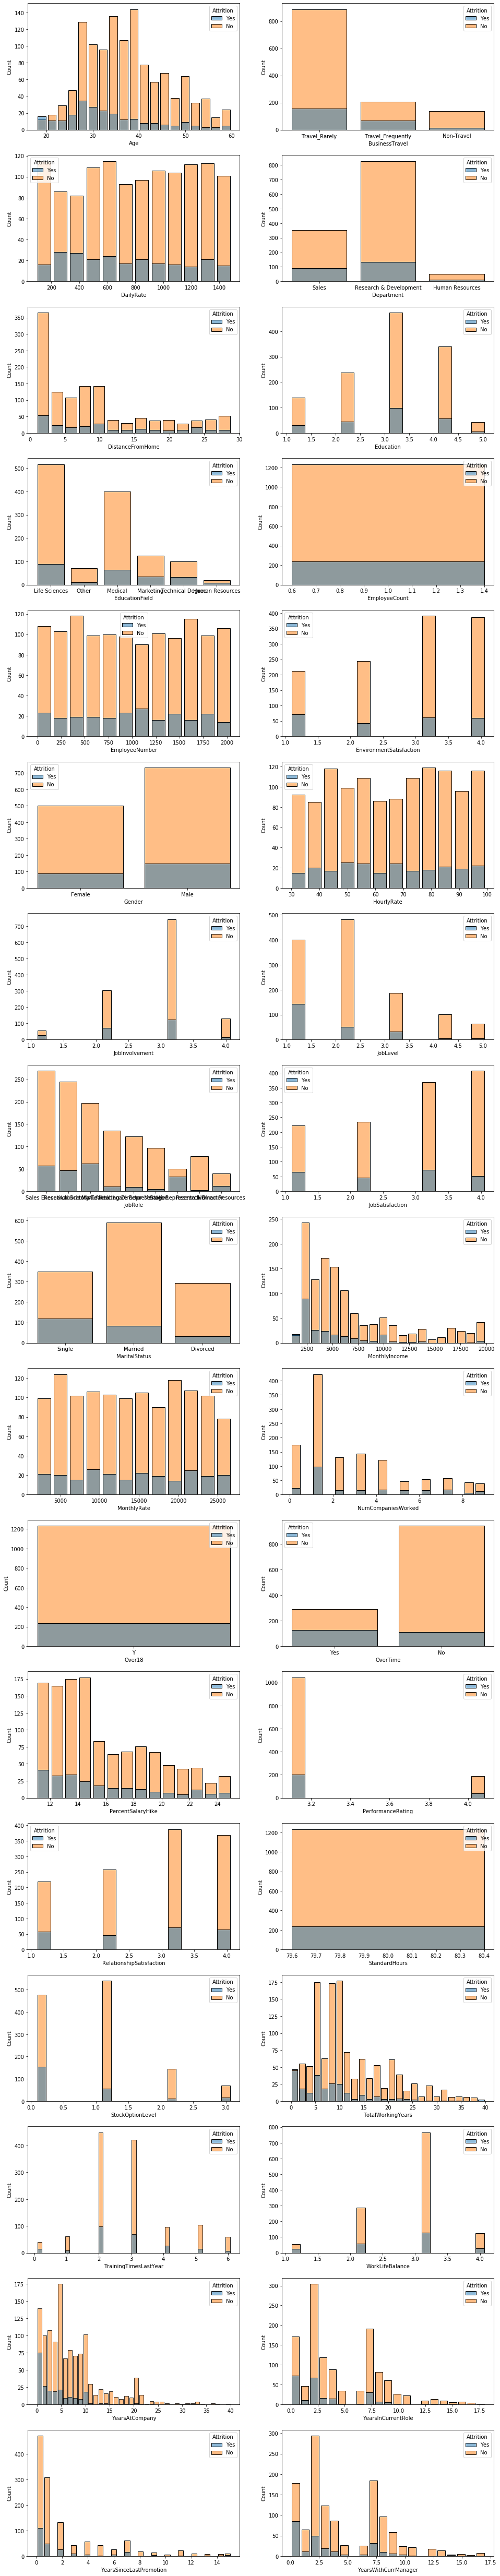

In [12]:
# Features vs attrition
_, ax = plt.subplots(nrows=int(dataframe.shape[1] / 2), ncols=2, figsize=(16, 90))
i, j = 0, 0
for feature in dataframe:
    if feature != "Attrition":
        sns.histplot(
            x=feature,
            hue="Attrition",
            data=dataframe,
            shrink=.8,
            ax=ax[i, j]
        )
        i = i+1 if j != 0 else i
        j = j+1 if j == 0 else 0

## 3. Data Manipulation <a class="anchor" id="data-manipulation"></a>
---

In this section, after eliminating features that doesn't change or are not related to attrition, and replacing categorical features to new numerical ones, we could see that 'Age', 'JobLevel' and 'MonthlyIncome' are some characteristics that seems to have linear relationship with attrition.

In [13]:
# Drop irrelevant columns
processed_dataframe = dataframe.drop(["Over18", "EmployeeNumber", "EmployeeCount", "StandardHours"], axis=1)

In [14]:
# Replace categorical values
processed_dataframe["Attrition"] = processed_dataframe["Attrition"].replace("No", 0)
processed_dataframe["Attrition"] = processed_dataframe["Attrition"].replace("Yes", 1)

processed_dataframe_copy = processed_dataframe.copy()
for feature, type_ in processed_dataframe_copy.dtypes.items():
    if type_ == object:
        column = processed_dataframe.pop(feature)
        new_columns = pd.get_dummies(column, prefix=feature)
        processed_dataframe = pd.concat([processed_dataframe, new_columns], axis=1)

processed_dataframe.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


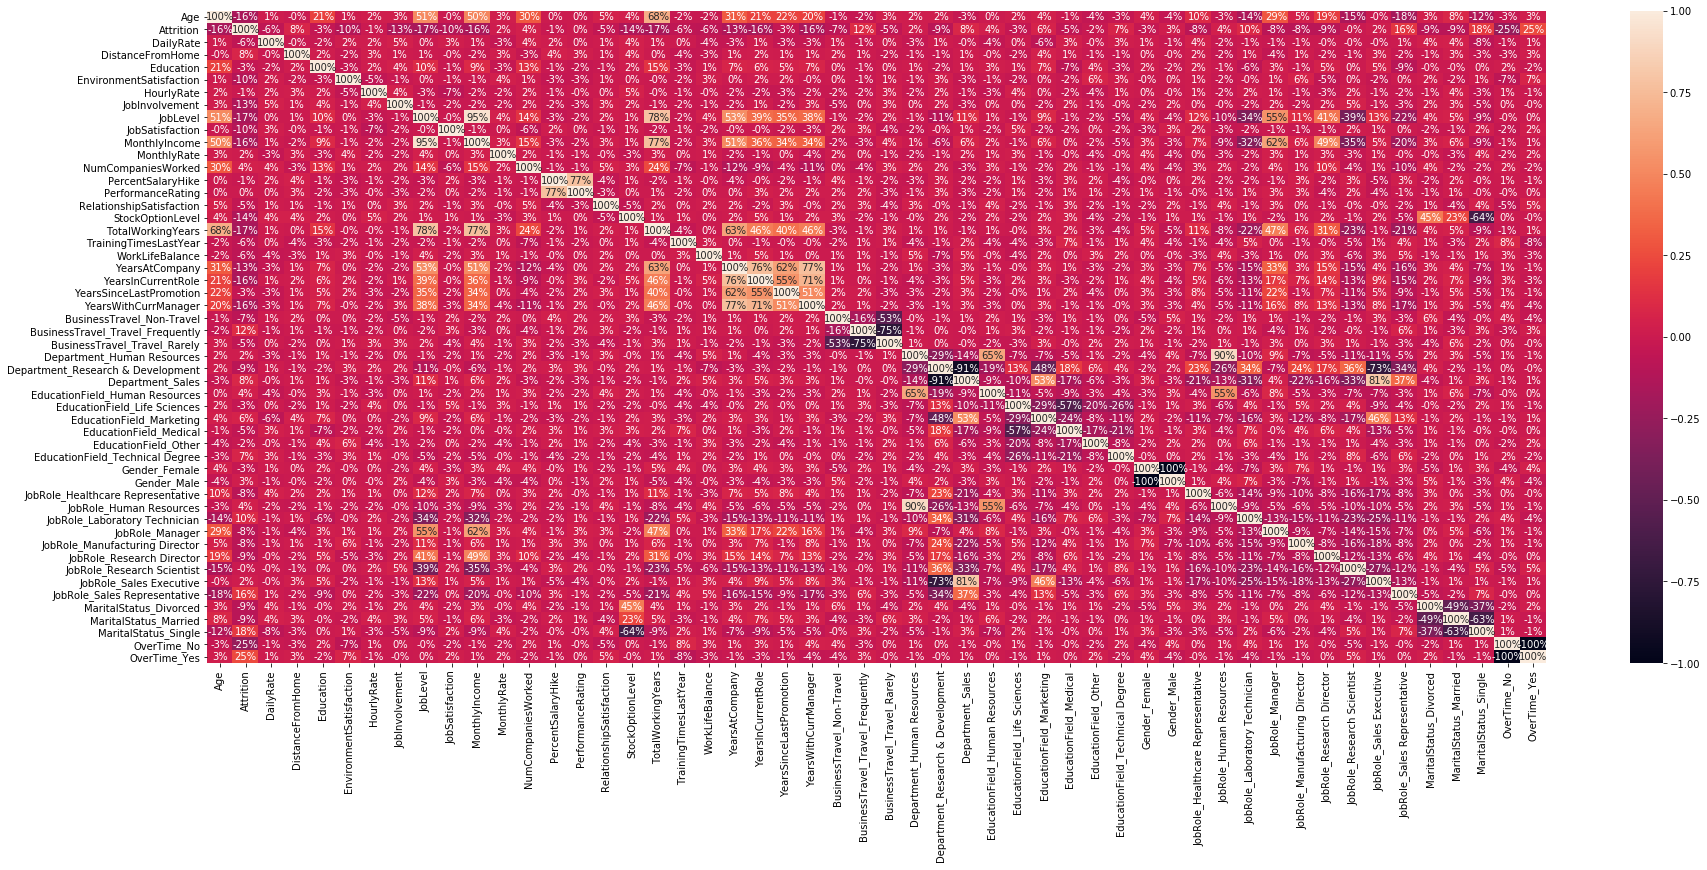

In [15]:
# Feature correlation
plt.figure(figsize=(30, 12))
sns.heatmap(processed_dataframe.corr(), annot=True, fmt=".0%")

## 4. Evaluation Metrics <a class="anchor" id="metrics"></a>
---

To evaluate the models' performance, some metrics and techniques were choosen.

- accuracy: is the total number of correct answers, divided by the total number of samples.
- recall: is the number of true positives, divided by the total number of actual positive samples.
- precision: is the number of true positives, divided by the total number of predicted positive samples.
- f-score: is the harmonic mean of precision and recall. (beta helps prioritize one of the metrics).
- cross-validation: is a resampling technique used to evaluate models on a limited data sample.
- grid search: is a exhastive search of specific parameter values for an estimator.
- learning curves: is used to evaluate bias and variance of a model.

In [16]:
# Train function
def train(x, y, model_class):

    def _scorer(estimator, x, y):
        y_pred = estimator.predict(x)
        score = fbeta_score(y, y_pred, beta=2)
        return score

    # Grid search
    grid_search = GridSearchCV(
        model_class(),
        model_class.PARAMS,
        scoring={"accuracy": "accuracy", "f_beta": _scorer, "precision": "precision", "recall": "recall"},
        refit="f_beta",
        cv=CV,
        return_train_score=True
    )
    grid_search.fit(x, y)
    cv_results = grid_search.cv_results_
    best_params = grid_search.best_params_
    best_index = grid_search.best_index_

    # Compute learning curves
    set_size, train_error, test_error = \
        learning_curve(model_class(**best_params), x, y, cv=CV, train_sizes=np.linspace(0.02, 1, 100), scoring=_scorer)
    learning_curves = np.array([set_size, train_error.mean(axis=1), test_error.mean(axis=1)])
    plt.figure(figsize=(12, 6))
    plt.plot(learning_curves[0, :], learning_curves[1, :], label="training")
    plt.plot(learning_curves[0, :], learning_curves[2, :], label="validation")
    plt.legend(loc="best")
    plt.ylim(0, 1)
    plt.ylabel("Error", size=16)
    plt.xlabel("Number of training samples", size=16)

    # Compute scores
    results = {
        "accuracy": cv_results[f"mean_test_accuracy"][best_index],
        "f_beta": cv_results[f"mean_test_f_beta"][best_index],
        "precision": cv_results[f"mean_test_precision"][best_index],
        "recall": cv_results[f"mean_test_recall"][best_index],
        "model": grid_search.best_estimator_,
        "best_params": best_params,
        "learning_curves": learning_curves
    }

    print(f"accuracy: {results['accuracy']}")
    print(f"f_beta: {results['f_beta']}")
    print(f"precision: {results['precision']}")
    print(f"recall: {results['recall']}")
    print(f"best_params: {results['best_params']}")
    return results

In [17]:
# Test function
import matplotlib
def test(x, y, model):
    y_pred = model.predict(x)
    scores = {
        "accuracy": accuracy_score(y, y_pred),
        "f_beta": fbeta_score(y, y_pred, beta=2),
        "precision": precision_score(y, y_pred),
        "recall": recall_score(y, y_pred),
    }
    print(f"accuracy: {scores['accuracy']}")
    print(f"f_beta: {scores['f_beta']}")
    print(f"precision: {scores['precision']}")
    print(f"recall: {scores['recall']}")
    plot_confusion_matrix(model, x, y)

## 5. Models <a class="anchor" id="models"></a>
---

Before getting into modeling, the data must be divided into trainig and test set to evaluate the models on unseen samples (validation set will be accounted using cross-validation). Also, the data must be scaled in order to bring all the features to the same scale, since some algorithms are very influenced by features variability.

In [18]:
# Split dataset
x = processed_dataframe.drop("Attrition", axis=1)
y = processed_dataframe["Attrition"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=1)
print(f"train size: {len(x_train)}")
print(f"test size: {len(x_test)}")

train size: 1176
test size: 294


In [19]:
# Scale dataset
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)
y_train = y_train.values
y_test = y_test.values

### 5.1. Baseline <a class="anchor" id="baseline"></a>

In [20]:
# Model
class Baseline(BaseEstimator, ClassifierMixin):
    PARAMS = {}

    def __init__(self, **kwargs):
        pass

    def fit(self, x, y):
        pass

    def predict(self, x):
        return np.zeros(len(x))

    def predict_proba(self, x):
        return np.zeros((len(x), 2))

accuracy: 0.8477893977641544
f_beta: 0.0
precision: 0.0
recall: 0.0
best_params: {}


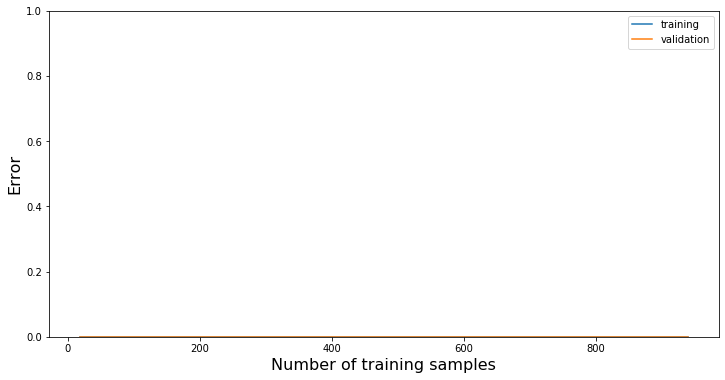

In [21]:
# Train
results = train(x_train_norm, y_train, Baseline)

accuracy: 0.8027210884353742
f_beta: 0.0
precision: 0.0
recall: 0.0


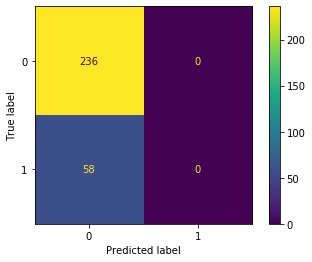

In [22]:
# Test
test(x_test_norm, y_test, results["model"])

### 5.2. Look at Some Models <a class="anchor" id="some-models"></a>

In [23]:
# Evaluate
MODELS = {
    "Logistic Regression": BaseLogisticRegression,
    "Random Forest": RandomForestClassifier,
    "SVM": SVC,
    "KNN": KNeighborsClassifier,
}
scores = []
for model_name, model_class in MODELS.items():
    scores.append(cross_val_score(model_class(), x_train_norm, y_train, cv=10, scoring="f1"))

Text(0, 0.5, 'F-score')

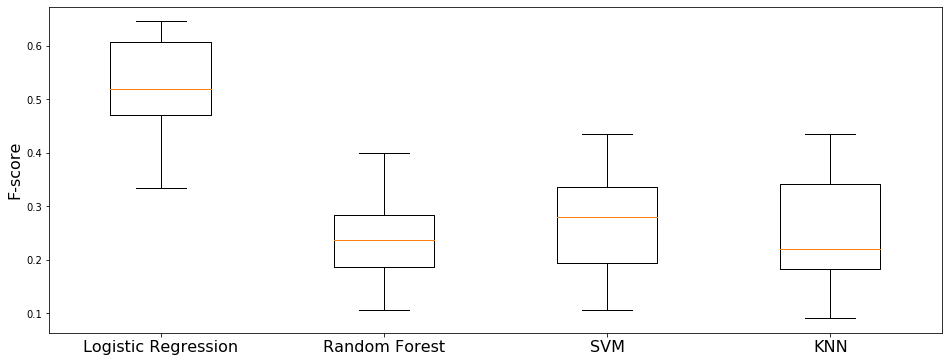

In [24]:
# Plot
_, ax = plt.subplots(figsize=(16, 6))
plt.boxplot(scores)
_ = ax.set_xticklabels(MODELS.keys(), size=16)
plt.ylabel("F-score", size=16)

### 5.3. Logistic Regression <a class="anchor" id="logistic-regression"></a>

In [25]:
class LogisticRegression(BaseLogisticRegression):
    PARAMS = {
        "C": np.arange(0.1, 10, 1),
        "intercept_scaling": np.arange(0.1, 10, 1)
    }

    def __init__(self, C=1, intercept_scaling=1):
        BaseLogisticRegression.__init__(self, C=C, intercept_scaling=intercept_scaling, solver="liblinear", class_weight="balanced", random_state=1)

    def fit(self, x, y=None):
        BaseLogisticRegression.fit(self, x, y)

    def predict(self, x):
        y_pred = BaseLogisticRegression.predict(self, x)
        return y_pred

accuracy: 0.7040822214208438
f_beta: 0.5969812434020076
precision: 0.3111161913732445
recall: 0.7766666666666666
best_params: {'C': 1.1, 'intercept_scaling': 0.1}


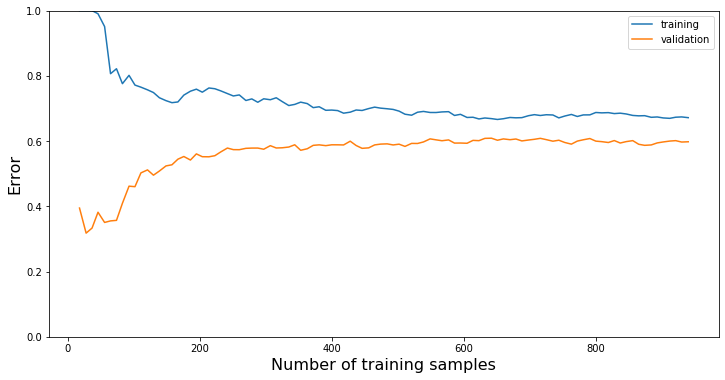

In [26]:
# Train
results = train(x_train_norm, y_train, LogisticRegression)

accuracy: 0.7074829931972789
f_beta: 0.6843575418994413
precision: 0.3888888888888889
recall: 0.8448275862068966


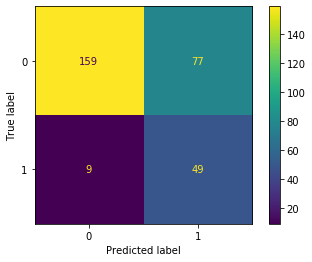

In [27]:
# Test
test(x_test_norm, y_test, results["model"])

### 5.4. Feature Engineering <a class="anchor" id="feature-engineering"></a>

In [28]:
# Create new features
x["TimePerJob"] = 0
for index, row in x.iterrows():
    if row["NumCompaniesWorked"] > 0:
        x.loc[index, "TimePerJob"] = row["TotalWorkingYears"] / row["NumCompaniesWorked"]

x["YearsWithoutPromotionRatio"] = x["YearsSinceLastPromotion"] / x["YearsAtCompany"]
x["YearsWithoutPromotionRatio"] = x["YearsWithoutPromotionRatio"].fillna(0)

In [29]:
# Transform features
FEATURES = ["DistanceFromHome", "MonthlyIncome", "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "TimePerJob"]
for feature in FEATURES:
    x[feature] = np.log1p(x[feature])

In [30]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=1)
print(f"train size: {len(x_train)}")
print(f"test size: {len(x_test)}")

train size: 1176
test size: 294


In [31]:
# Scale
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)
y_train = y_train.values
y_test = y_test.values

accuracy: 0.7720988099531193
f_beta: 0.6205145711924767
precision: 0.3751645986895415
recall: 0.7431746031746032
best_params: {'C': 0.1, 'intercept_scaling': 2.1}


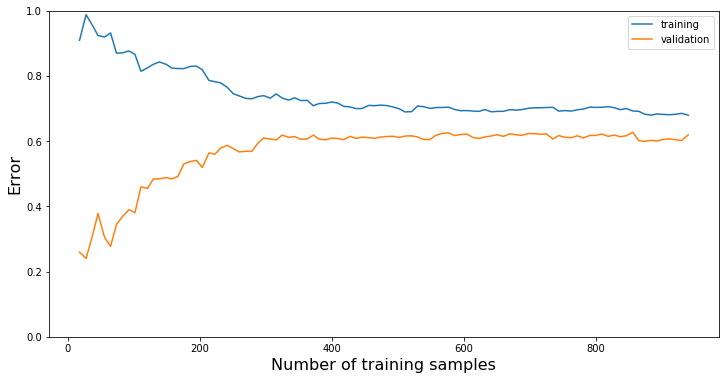

In [32]:
# Train
results = train(x_train_norm, y_train, LogisticRegression)

accuracy: 0.7551020408163265
f_beta: 0.6696428571428571
precision: 0.4326923076923077
recall: 0.7758620689655172


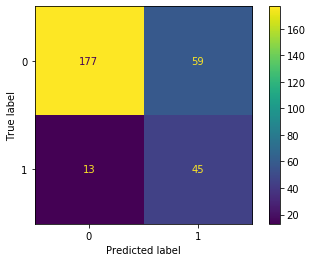

In [33]:
# Test
test(x_test_norm, y_test, results["model"])

### 5.5. Feature Selection <a class="anchor" id="feature-selection"></a>

In [34]:
# Remove multicollinearity
x_train_selected = x_train.copy()
x_test_selected = x_test.copy()
for feature in ["JobLevel", "PerformanceRating", "TotalWorkingYears", "YearsAtCompany", "YearsWithCurrManager", "JobRole_Human Resources", "JobRole_Sales Representative"]:
    x_train_selected.pop(feature)
    x_test_selected.pop(feature)

In [35]:
print(f"new shape: {x_train_selected.shape}")

new shape: (1176, 46)


In [36]:
# Normalize dataset
scaler = MinMaxScaler()
x_train_selected_norm = scaler.fit_transform(x_train_selected)
x_test_selected_norm = scaler.transform(x_test_selected)

accuracy: 0.780616660656329
f_beta: 0.6291799020756839
precision: 0.3852363039415831
recall: 0.7490476190476191
best_params: {'C': 8.1, 'intercept_scaling': 2.1}


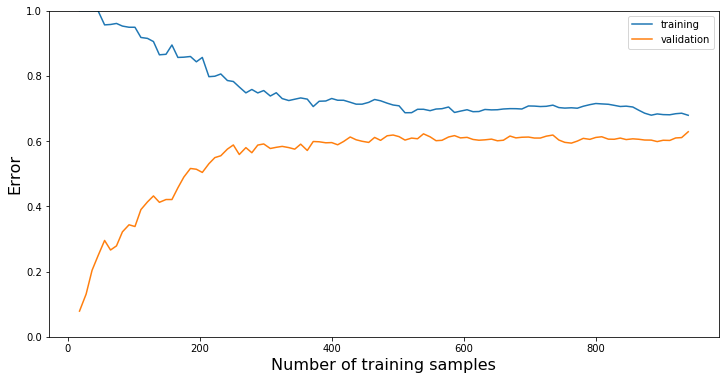

In [37]:
# Train
results = train(x_train_selected_norm, y_train, LogisticRegression)

accuracy: 0.7551020408163265
f_beta: 0.6696428571428571
precision: 0.4326923076923077
recall: 0.7758620689655172


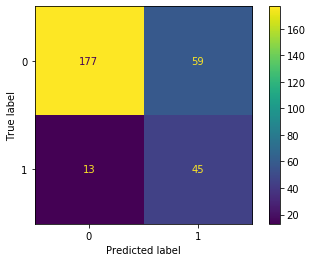

In [38]:
# Test
test(x_test_selected_norm, y_test, results["model"])

### 5.6. Oversampling <a class="anchor" id="oversampling"></a>

In [39]:
# Upsampling
new_x_train_norm, new_y_train = SMOTE().fit_resample(x_train_norm, y_train)
indexes = np.arange(0, len(new_x_train_norm))
np.random.shuffle(indexes)
new_x_train_norm, new_y_train = new_x_train_norm[indexes], new_y_train[indexes]
print(f"number of positive samples: {new_y_train.sum()}")

number of positive samples: 997


accuracy: 0.7673102353874636
f_beta: 0.8759530394030041
precision: 0.7000429196505193
recall: 0.9347537688442211
best_params: {'C': 0.1, 'intercept_scaling': 0.1}


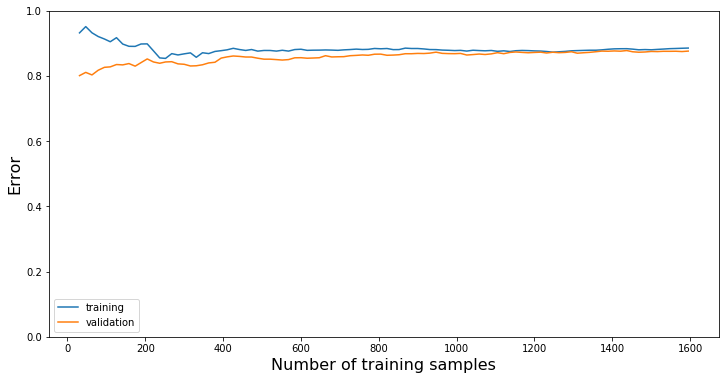

In [40]:
# Train
results = train(new_x_train_norm, new_y_train, LogisticRegression)

accuracy: 0.6394557823129252
f_beta: 0.6578947368421051
precision: 0.33783783783783783
recall: 0.8620689655172413


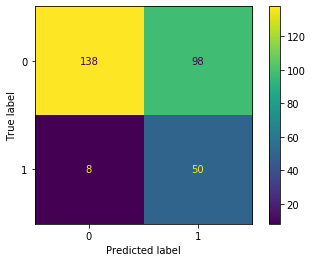

In [41]:
# Test
test(x_test_norm, y_test, results["model"])

## 6. Insights <a class="anchor" id="insights"></a>
---

### 6.1. Prediction <a class="anchor" id="prediction"></a>

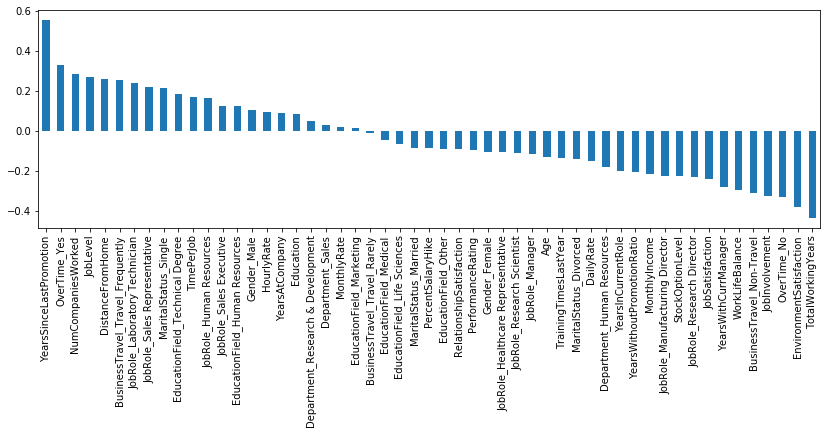

In [42]:
# Feature importance
model = results["model"]
importances = pd.Series(model.coef_[0, :], index=x_train.columns)
importances = importances.sort_values(ascending=False)
plt.subplots(figsize=(14, 4))
importances.plot(kind="bar")

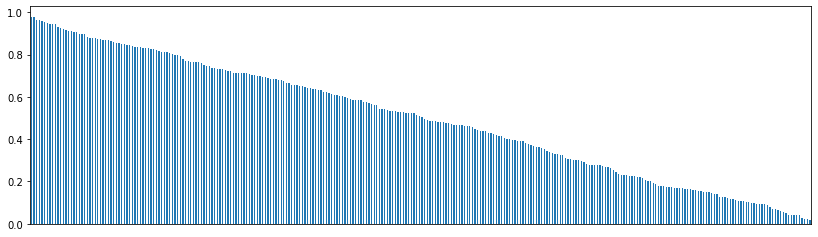

In [43]:
# Attrition probability
probabilities = model.predict_proba(x_test_norm)
attrition_probabilities = pd.Series(probabilities[:, 1]).sort_values(ascending=False)
_, ax = plt.subplots(figsize=(14, 4))
ax.get_xaxis().set_visible(False)
attrition_probabilities.plot(kind="bar")

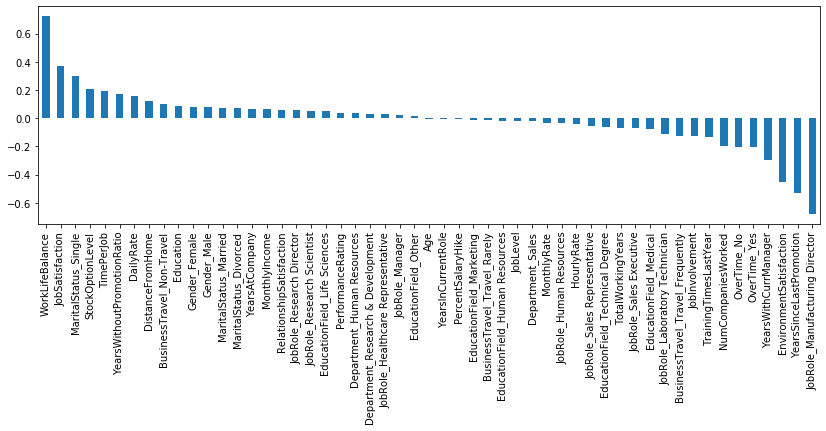

In [44]:
# Feature relevance per sample
coef = model.coef_[0, :]
intercept = model.intercept_
sample = x_test_norm[0:1, :]

relevance = (sample * coef) + (intercept / sample.shape[1])
relevance = pd.Series(relevance[0, :], index=x_train.columns)
relevance = relevance.sort_values(ascending=False)

plt.subplots(figsize=(14, 4))
relevance.plot(kind="bar")

In [45]:
x_test.iloc[0]

Age                                    37.000000
DailyRate                             370.000000
DistanceFromHome                        2.397895
Education                               4.000000
EnvironmentSatisfaction                 4.000000
HourlyRate                             58.000000
JobInvolvement                          3.000000
JobLevel                                2.000000
JobSatisfaction                         1.000000
MonthlyIncome                           8.346168
MonthlyRate                          4992.000000
NumCompaniesWorked                      1.000000
PercentSalaryHike                       2.772589
PerformanceRating                       3.000000
RelationshipSatisfaction                2.000000
StockOptionLevel                        0.000000
TotalWorkingYears                       2.397895
TrainingTimesLastYear                   4.000000
WorkLifeBalance                         1.000000
YearsAtCompany                          2.397895
YearsInCurrentRole  

### 6.2. Clustering <a class="anchor" id="clustering"></a>

In [46]:
# Groups

# create dataset
new_x = pd.DataFrame()
x_copy = dataframe.copy()
for feature, type_ in dataframe.dtypes.items():
    if type_ == object and feature != "Attrition":
        column = x_copy.pop(feature)
        new_columns = pd.get_dummies(column, prefix=feature)
        new_x = pd.concat([new_x, new_columns], axis=1)

# attrition rate by group
groups = []
MAX_FEATURES = 4
for i in range(1, MAX_FEATURES):
    for features in combinations(new_x.columns, i):
        for answer in [0, 1]:
            x_selected = new_x[list(features)]
            x_sum = x_selected.eq(answer, axis=0).all(axis=1).to_frame("has_all_features")
            x_sum["Attrition"] = y
            x_complete = x_sum[(x_sum["has_all_features"] == True)]
            if not x_complete.empty:
                x_attrition = x_complete[(x_complete["Attrition"] == 1)]
                groups.append({
                    "features": list(features),
                    "answer": answer,
                    "total_samples": len(x_complete),
                    "n_attrition": len(x_attrition),
                    "attrition_rate": len(x_attrition) / len(x_complete)
                })

# get top 5 groups
MIN_SAMPLES = 40
groups_sorted = sorted(groups, key=lambda item: item["attrition_rate"], reverse=True)
groups_filtered = list(filter(lambda item: item["total_samples"] > MIN_SAMPLES, groups_sorted))
top_groups = groups_filtered[0:5]
top_groups

[{'features': ['Department_Sales', 'MaritalStatus_Single', 'OverTime_Yes'],
  'answer': 1,
  'total_samples': 49,
  'n_attrition': 32,
  'attrition_rate': 0.6530612244897959},
 {'features': ['Gender_Male', 'MaritalStatus_Single', 'OverTime_Yes'],
  'answer': 1,
  'total_samples': 68,
  'n_attrition': 39,
  'attrition_rate': 0.5735294117647058},
 {'features': ['Gender_Male', 'JobRole_Laboratory Technician', 'OverTime_Yes'],
  'answer': 1,
  'total_samples': 42,
  'n_attrition': 22,
  'attrition_rate': 0.5238095238095238},
 {'features': ['BusinessTravel_Travel_Rarely',
   'JobRole_Laboratory Technician',
   'OverTime_Yes'],
  'answer': 1,
  'total_samples': 45,
  'n_attrition': 23,
  'attrition_rate': 0.5111111111111111},
 {'features': ['JobRole_Laboratory Technician', 'OverTime_Yes'],
  'answer': 1,
  'total_samples': 62,
  'n_attrition': 31,
  'attrition_rate': 0.5}]

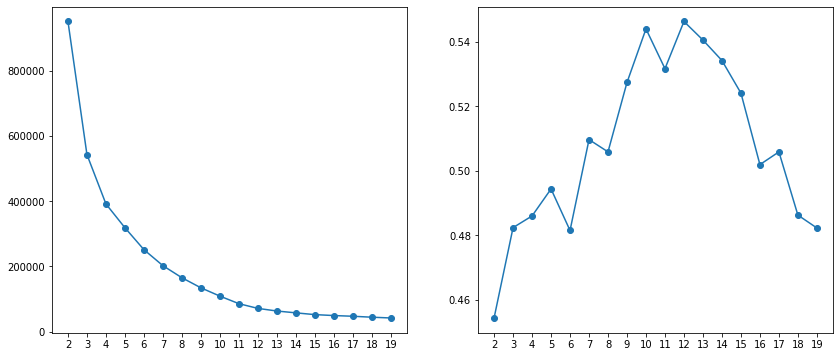

In [47]:
# Clustering
MAX_K = 20

# scale and transform
x_norm = StandardScaler().fit_transform(x)
x_tsne = TSNE(n_components=2).fit_transform(x_norm)

# elbow method
inertias = []
for k in range(2, MAX_K):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=1)
    kmeans.fit(x_tsne)
    inertias.append(kmeans.inertia_)

# silhouette method
silhouettes = []
for k in range(2, MAX_K):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=1)
    kmeans.fit(x_tsne)
    score = silhouette_score(x_tsne, kmeans.labels_)
    silhouettes.append(score)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax[0].set_xticks(range(2, MAX_K))
ax[1].set_xticks(range(2, MAX_K))
ax[0].plot(range(2, MAX_K), inertias, marker="o")
ax[1].plot(range(2, MAX_K), silhouettes, marker="o")

In [48]:
# Clusters attrition
kmeans = KMeans(n_clusters=9, n_init=20, random_state=1)
clusters = kmeans.fit_predict(x_tsne)
df_clusters = y.to_frame()
df_clusters["Cluster"] = clusters
attrition_per_cluster = []
for cluster in np.unique(clusters):
    df_selected = df_clusters[df_clusters["Cluster"] == cluster]
    total_samples = len(df_selected)
    attrition_samples = len(df_selected[df_selected["Attrition"] == 1])
    attrition_per_cluster.append({
        "total_samples": total_samples,
        "attrition_samples": attrition_samples,
        "attrition_rate": attrition_samples / total_samples,
        "cluster": cluster
    })
attrition_per_cluster

[{'total_samples': 186,
  'attrition_samples': 42,
  'attrition_rate': 0.22580645161290322,
  'cluster': 0},
 {'total_samples': 154,
  'attrition_samples': 17,
  'attrition_rate': 0.11038961038961038,
  'cluster': 1},
 {'total_samples': 234,
  'attrition_samples': 31,
  'attrition_rate': 0.13247863247863248,
  'cluster': 2},
 {'total_samples': 325,
  'attrition_samples': 56,
  'attrition_rate': 0.1723076923076923,
  'cluster': 3},
 {'total_samples': 80,
  'attrition_samples': 2,
  'attrition_rate': 0.025,
  'cluster': 4},
 {'total_samples': 143,
  'attrition_samples': 10,
  'attrition_rate': 0.06993006993006994,
  'cluster': 5},
 {'total_samples': 83,
  'attrition_samples': 33,
  'attrition_rate': 0.39759036144578314,
  'cluster': 6},
 {'total_samples': 121,
  'attrition_samples': 8,
  'attrition_rate': 0.06611570247933884,
  'cluster': 7},
 {'total_samples': 144,
  'attrition_samples': 38,
  'attrition_rate': 0.2638888888888889,
  'cluster': 8}]

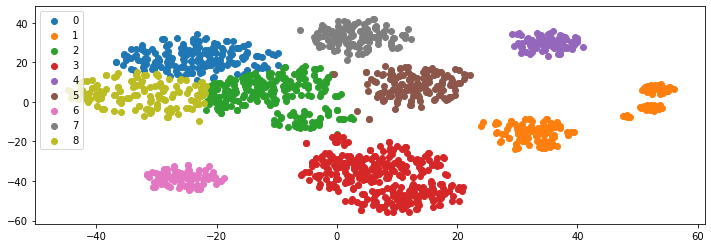

In [49]:
# Visualize clusters
plt.figure(figsize=(12, 4))
for cluster in np.unique(clusters):
    plt.scatter(x_tsne[clusters == cluster, 0], x_tsne[clusters == cluster, 1], label=cluster)
plt.legend(loc="best")